This notebook was used to analyse the most frequent terms in the topic analysis performed by ChatGPT.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# read data.txt into text
text = open("data.txt", "r")
lines = []
topics = []
for line in text:
  l = line.split(" - ")
  lines.append(l[0].strip())
  topics.append(l[-1].strip().replace(" ", "").split(","))

In [34]:
# Create a pandas dataframe with lines and topics
df = pd.DataFrame({'lines': lines, 'topics': topics})

# Create a datataframe with the topics and their counts
topic_counts = {}
for topic in topics:
  for t in topic:
    t = t.strip()
    if t == '':
      continue
    if t in topic_counts:
      topic_counts[t] += 1
    else:
      topic_counts[t] = 1

topic_counts = pd.DataFrame({'topic': list(topic_counts.keys()), 'count': list(topic_counts.values())})

# Replace the topic name movetoMunich with move_Munich in topic_counts
topic_counts['topic'] = topic_counts['topic'].replace('movetoMunich', 'move_Munich')
topic_counts['topic'] = topic_counts['topic'].replace('domestictension', 'domestic_tensions')

In [35]:
topic_counts["topic"].unique()

array(['food', 'scarcity', 'weather', 'stealing', 'control', 'raid',
       'cold', 'hunger', 'war', 'christmas', 'domestic_tensions', 'work',
       'move_Munich', 'suicide', 'stress'], dtype=object)

In [36]:
topic_counts.sort_values(by=['count'], ascending=False)

,topic,count
11,work,37
0,food,35
2,weather,26
5,raid,24
1,scarcity,11
6,cold,11
3,stealing,8
7,hunger,8
10,domestic_tensions,7
9,christmas,5


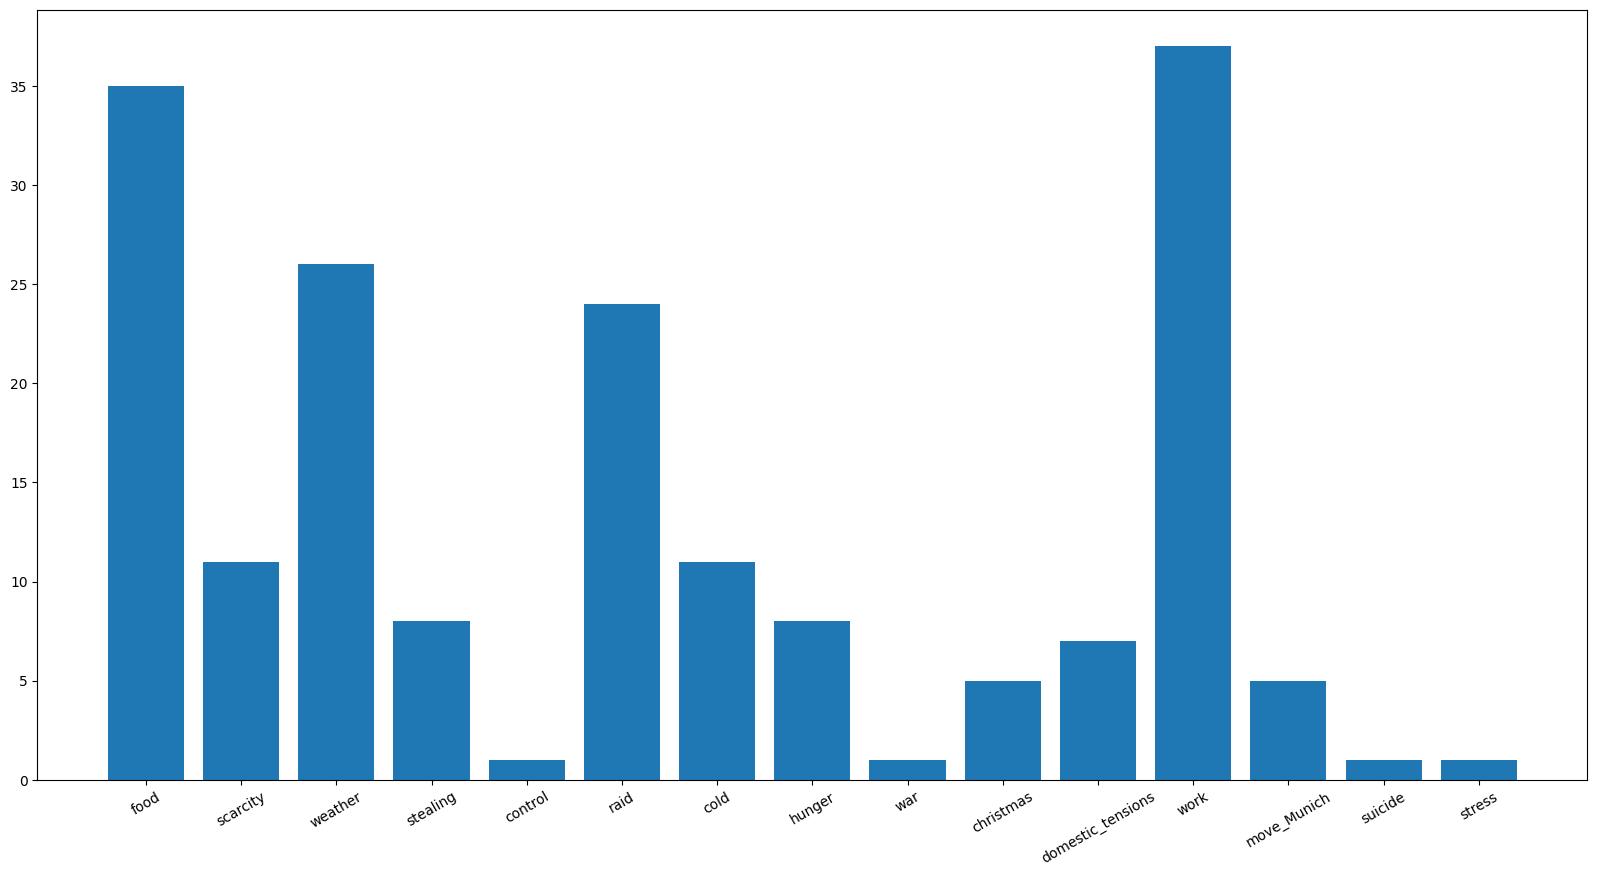

In [46]:
# Create a bar chart of the topics and their counts, sorted by count in very high resolution
plt.figure(figsize=(20, 10))
plt.bar(topic_counts['topic'], topic_counts['count'])

plt.xticks(rotation=30)
# plt.show()

# Save the plot in very high resolution
plt.savefig('topics.png', dpi=400)

In [11]:
# Create a dataframe with the topics and their coutns
df["topics"].value_counts()

topics
[]                                  21
[work]                              16
[raid]                              10
[weather]                            8
[work, food]                         7
[food]                               6
[raid, work]                         4
[work, raid]                         4
[food, scarcity]                     3
[movetoMunich]                       3
[stealing]                           2
[domestictension]                    2
[weather, cold]                      2
[weather, food]                      1
[movetoMunich, hunger, cold]         1
[weather, raid]                      1
[weather, scarcity]                  1
[cold, weather, movetoMunich]        1
[food, weather]                      1
[food, hunger]                       1
[cold, stealing]                     1
[cold, food, scarcity, hunger]       1
[cold, food, hunger, scarcity]       1
[work, weather]                      1
[work, food, suicide]                1
[work, food, stres

In [67]:
# Count the times where food and hunger appear together in topics
count = 0
for topic in topics:
  if "food" in topic and ("hunger" in topic or "scarcity" in topic):
    count += 1

count

12